<h1> User Engagement Analysis </h2>

<h2> Imporing data and packages </h2>

In [35]:
import pandas as pd
import numpy as np
import os
import warnings
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Importing essential libraries

In [2]:
warnings.filterwarnings('ignore')

Setting file paths

In [3]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
data_path = os.path.join(parent_dir,"data","teleco_aggr_data.csv") # setting path to data directory
data_path_2 = os.path.join(parent_dir,"data","teleco_clean_data.csv") # setting path to data directory
data_path_3 = os.path.join(parent_dir,"data","teleco_outlier_free_data.csv") # setting path to data directory

sys.path.insert(1, scripts_dir)

Importing data cleaning and summarizing scripts

In [4]:
from data_cleaning_functions import DataCleaner as Cleaner 
from data_summarizing_functions import DataSummarizer as Sumar

cleaner = Cleaner()
sumar = Sumar()

loading the dataframes

In [5]:
aggr_df= pd.read_csv(data_path)
df3= pd.read_csv(data_path_2)
outlier_free_df= pd.read_csv(data_path_3)

In [6]:
aggr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106857 entries, 0 to 106856
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MSISDN/Number      106856 non-null  object 
 1   xDr_session_count  106857 non-null  int64  
 2   session_dur        106857 non-null  float64
 3   Total_DL           106857 non-null  float64
 4   Total_UL           106857 non-null  float64
 5   total_vol          106857 non-null  float64
 6   youtube            106857 non-null  float64
 7   netflix            106857 non-null  float64
 8   google             106857 non-null  float64
 9   gaming             106857 non-null  float64
 10  email              106857 non-null  float64
 11  social             106857 non-null  float64
 12  other              106857 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 10.6+ MB


In [8]:
aggr_df.dropna(inplace=True)

In [24]:
def show_topN_per_col(df, main, cols):
    for col in cols:
        print("\nTop 10 customers based on"+col+"\n")
        print(df.sort_values(by=col, ascending=False).loc[:,[main, col]].head(10))


In [25]:
show_topN_per_col(aggr_df, "MSISDN/Number", ["xDr_session_count", "session_dur", "total_vol"])


Top 10 customers based onxDr_session_count

           MSISDN/Number  xDr_session_count
13527  33,626,320,676.00                 18
13181  33,625,779,332.00                 17
6438   33,614,892,860.00                 17
37053  33,659,725,664.00                 16
92924  33,760,536,639.00                 15
76364  33,675,877,202.00                 15
65119  33,667,163,239.00                 13
667    33,603,127,838.00                 12
1280   33,604,515,716.00                 12
13995  33,627,080,969.00                 12

Top 10 customers based onsession_dur

           MSISDN/Number  session_dur
13181  33,625,779,332.00   18553754.0
6438   33,614,892,860.00    9966898.0
92924  33,760,536,639.00    9279434.0
13527  33,626,320,676.00    8791927.0
65119  33,667,163,239.00    8744914.0
50282  33,662,840,755.00    6614270.0
57161  33,664,693,736.00    6288730.0
667    33,603,127,838.00    6287761.0
66030  33,667,456,716.00    5649882.0
92578  33,760,413,819.00    5321667.0

Top 10 custom

In [31]:
features = ["xDr_session_count", "session_dur", "total_vol"]
selected_metrics = aggr_df[features]

In [32]:
x = selected_metrics.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [33]:
np.mean(x), np.std(x), x.shape

(-1.4323098869761696e-16, 1.0000000000000002, (106856, 3))

In [34]:
normalised_df = pd.DataFrame(x,columns=features)

In [36]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [37]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
data_with_clusters = aggr_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
sumar.summ_columns(data_with_clusters)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,object,106856
1,xDr_session_count,0,0.0,int64,17
2,session_dur,0,0.0,float64,77538
3,Total_DL,0,0.0,float64,106851
4,Total_UL,0,0.0,float64,106779
5,total_vol,0,0.0,float64,106853
6,youtube,0,0.0,float64,106745
7,netflix,0,0.0,float64,106742
8,google,0,0.0,float64,106582
9,gaming,0,0.0,float64,106853


In [42]:
clus_min_df = sumar.find_agg(data_with_clusters, "Clusters", ["xDr_session_count", "session_dur", "total_vol"], ["min", "min", "min"], ["xDr_min", "dur_min", "total_vol_min"])
clus_max_df = sumar.find_agg(data_with_clusters, "Clusters", ["xDr_session_count", "session_dur", "total_vol"], ["max", "max", "max"], ["xDr_max", "dur_max", "total_vol_max"])
clus_count_df = sumar.find_agg(data_with_clusters, "Clusters", ["xDr_session_count", "session_dur", "total_vol"], ["count", "count", "count"], ["xDr_count", "dur_count", "total_vol_count"])
clus_mean_df = sumar.find_agg(data_with_clusters, "Clusters", ["xDr_session_count", "session_dur", "total_vol"], ["mean", "mean", "mean"], ["xDr_mean", "dur_mean", "total_vol_mean"])


In [44]:
clus_min_df

,Clusters,xDr_min,dur_min,total_vol_min
0,0,1,18235.0,177.006936
1,1,1,7142.0,33.249009
2,2,1,66594.0,370.420998


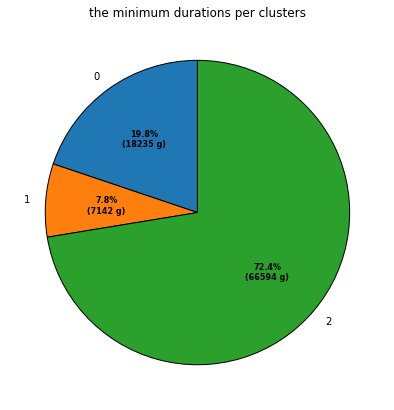

In [46]:
sumar.plot_pie(clus_min_df, ["Clusters", "dur_min"], "the minimum durations per clusters")

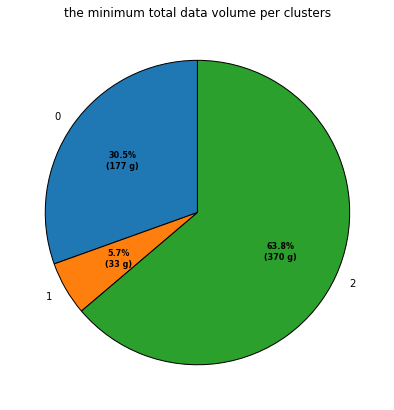

In [47]:
sumar.plot_pie(clus_min_df, ["Clusters", "total_vol_min"], "the minimum total data volume per clusters")

**Observations**
<ul>
    <li> the min value for xDr sessions is similar: 1</li>
    <li> cluster 2 has the largest min value for session duration and total volume used </li> 
</ul>

In [50]:
clus_max_df

,Clusters,xDr_max,dur_max,total_vol_max
0,0,4,1480875.0,2512.802189
1,1,2,1035261.0,950.760661
2,2,18,18553754.0,8846.226494


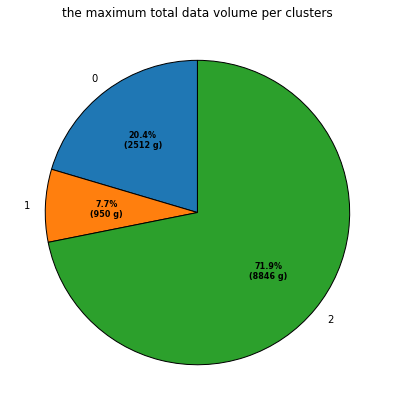

In [53]:
sumar.plot_pie(clus_max_df, ["Clusters", "total_vol_max"], "the maximum total data volume per clusters")

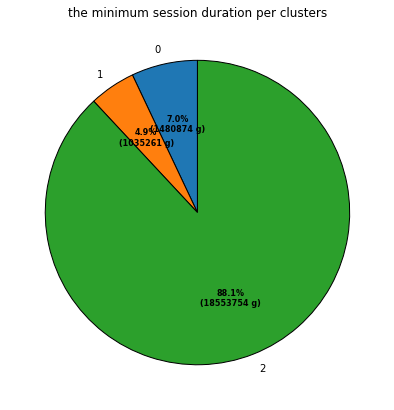

In [52]:
sumar.plot_pie(clus_max_df, ["Clusters", "dur_max"], "the minimum session duration per clusters")

**Observations**
<ul>
    <li> the clusters have increasingly greater maximum value for the xDr session counts as we go from cluster 0 to 2</li>
    <li> cluster 2 has the largest max (88.1%) value for session duration and total volume used </li> 
</ul>

In [ ]:
sumar.plot_pie(clus_min_df, ["Clusters", "total_vol_min"], "the minimum total data volume per clusters")

In [ ]:
print(clus_count_df)
print(clus_mean_df)